In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def visualize_distribution(data, bins=30, show_kde=True):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    """
    Visualizes the distribution of a numeric array using a histogram and an optional KDE overlay.

    Parameters:
    -----------
    train : array-like
        The input numeric train.
    bins : int, optional
        The number of bins for the histogram (default is 30).
    show_kde : bool, optional
        Whether to overlay a kernel density estimate (default is True).
    """
    # Ensure the input is a NumPy array for consistency
    data = np.asarray(data)
    if data.size == 0:
        raise ValueError("Input array is empty.")
    
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Plot the histogram of the train
    plt.hist(data, bins=bins, density=True, alpha=0.6, edgecolor='black', label='Histogram')
    
    # Overlay the KDE if requested
    if show_kde:
        kde = gaussian_kde(data)
        x_min, x_max = data.min(), data.max()
        x_vals = np.linspace(x_min, x_max, 200)
        plt.plot(x_vals, kde(x_vals), label='KDE', linewidth=2)
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Distribution of Data')
    plt.legend()
    return plt

In [19]:
import numpy as np
from scipy.stats import gaussian_kde

def kde_probabilities(X, bandwidth=None):
    """
    Computes Kernel Density Estimation (KDE) and returns probability densities for each point in X.

    Parameters:
    -----------
    X : array-like
        The input train points for which KDE is estimated.
    bandwidth : float, optional
        Bandwidth parameter (smoothing factor). If None, the default is used.

    Returns:
    --------
    densities : array
        Probability density estimates for each point in X.
    kde : gaussian_kde object
        The fitted KDE model.
    """
    X = np.asarray(X)  # Ensure X is a NumPy array
    
    # Fit KDE model
    kde = gaussian_kde(X, bw_method=bandwidth)
    
    # Evaluate KDE at each point in X to get the probability densities
    densities = kde(X)
    
    return densities, kde


# Compute KDE probabilities
probs, kde_model = kde_probabilities(X)

# Print the first few probability estimates
print("Probability estimates:\n", probs[0:20])


Probability estimates:
 [0.03207907 0.07904662 0.07831625 0.08539947 0.07621315 0.08086663
 0.06425564 0.02152163 0.07761454 0.02578701 0.07527419 0.08285052
 0.06534012 0.04413854 0.07168165 0.04488034 0.03036627 0.04648871
 0.02849958 0.07482222]


(10001,)


<function matplotlib.pyplot.show(close=None, block=None)>

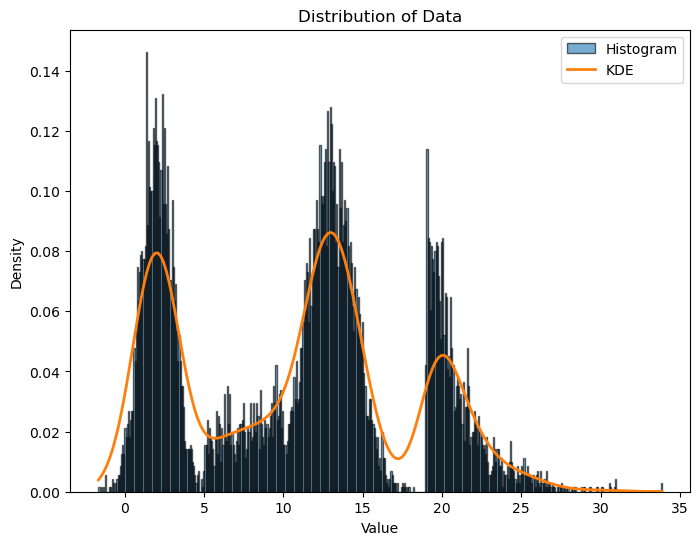

In [16]:
X = np.genfromtxt('parental_anxiety_vs_kids_age.csv', delimiter=',')
print(X.shape)
plt=visualize_distribution(X, bins=500, show_kde=True)
plt.show

In [29]:
from sklearn.metrics.pairwise import *
from numpy.linalg import *
probs = probs.reshape(-1,1)
print(probs.shape)
X = X.reshape(-1,1)
print(X.shape)
def kernel_ridge_regression(X, y, gamma):
    
    K = rbf_kernel(X, gamma=gamma)
    lamda = 0.01 * np.eye(K.shape[1])
    y_hat = K.dot(inv(K + lamda).dot(y))
    return y_hat

y_hat = kernel_ridge_regression(X, probs, 1)

(10001, 1)
(10001, 1)


In [31]:
print(y_hat[0:3])
print(probs[0:3])

[[0.03207821]
 [0.07904618]
 [0.07831581]]
[[0.03207907]
 [0.07904662]
 [0.07831625]]
